# Regression

# Boston Housing Price Prediction 


In [20]:
#Se importan librerias
import numpy as np
import pandas as pd
import sklearn

In [21]:
#Se muestran las versiones de las librerias
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.26.4
2.1.4
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
1.5.2


In [ ]:
df = pd.read_csv('data//housing.data', delim_whitespace=True, header=None) #Se crea el dataframe con la información

In [ ]:
df.head() #da las primeras 5 filas del data set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [ ]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] #agrega los nombres a las columnas

In [ ]:
df.columns = col_name #cambia los nombres de las columnas

In [26]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


alternatively, one can load the data from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) itself

In [ ]:
#from sklearn.datasets import load_boston
#boston = load_boston()
#Se importa el dataset boston, se agrega otro código ya que por la verscion de scikit learn ya no se encuentra disponible
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)

In [ ]:
# Muestra las claves del diccionario 'boston'. Esto revela los diferentes componentes del dataset,
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(boston.DESCR)
#Este código accede al atributo DESCR del objeto boston. En los datasets de scikit-learn, DESCR es una cadena de texto que contiene una descripción detallada del conjunto de datos

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [ ]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) # Crea un DataFrame de pandas a partir de los datos del dataset de Boston.

df_boston['MEDV'] = boston.target # Añade la variable objetivo (MEDV) como una nueva columna al DataFrame.

In [ ]:
df_boston.head() #Se imprimen las primeras 5 filas del dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Anaysis (EDA)

In [ ]:
df.describe() #Describe da informacióne stadística basica de las diferentes variables, desde maximo, minimo, intervalos, desv.est y más

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#Importa librerias para crear grafico
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.12.2


c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

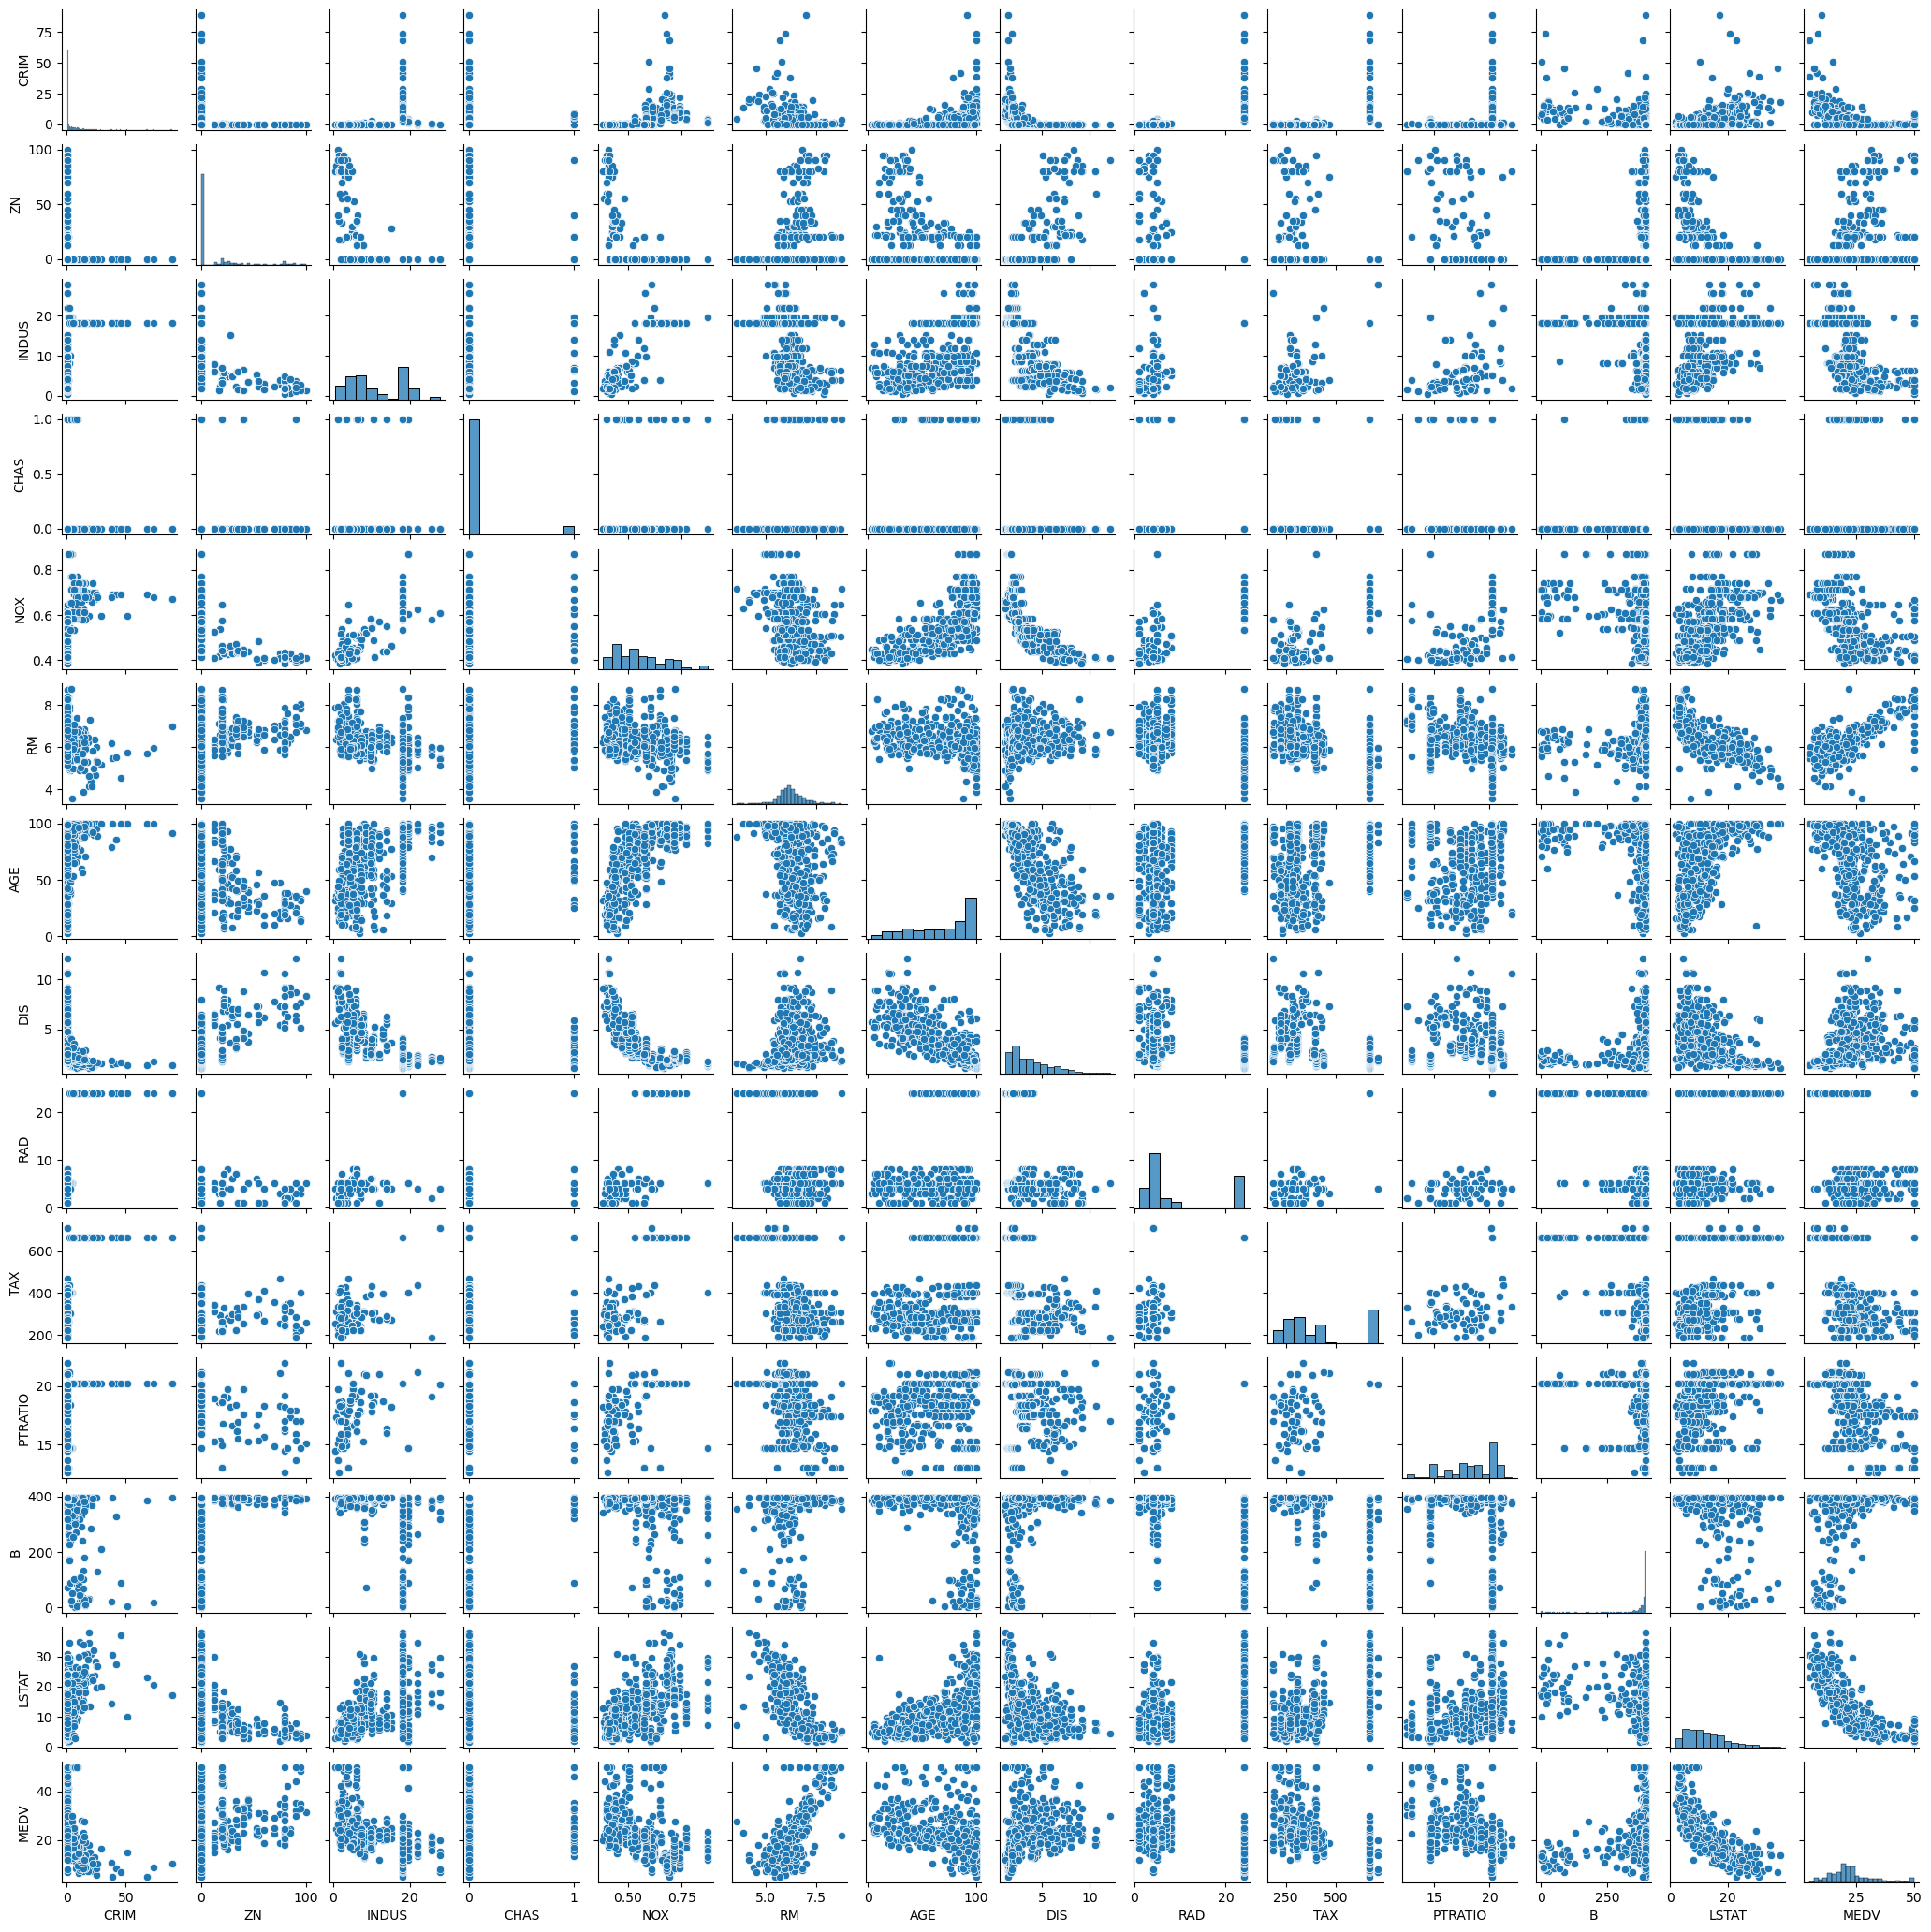

In [ ]:
sns.pairplot(df, height=1.5);  #Crea un gráfico de pares (pairplot) que muestra la relación entre todas las variables numéricas en el DataFrame 
# El parámetro 'height=1.5' ajusta el tamaño de cada subplot en el gráfico.
plt.show() 

In [ ]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM'] #Crea una lista llamada 'col_study' que contiene los nombres de las columnas (características)

c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

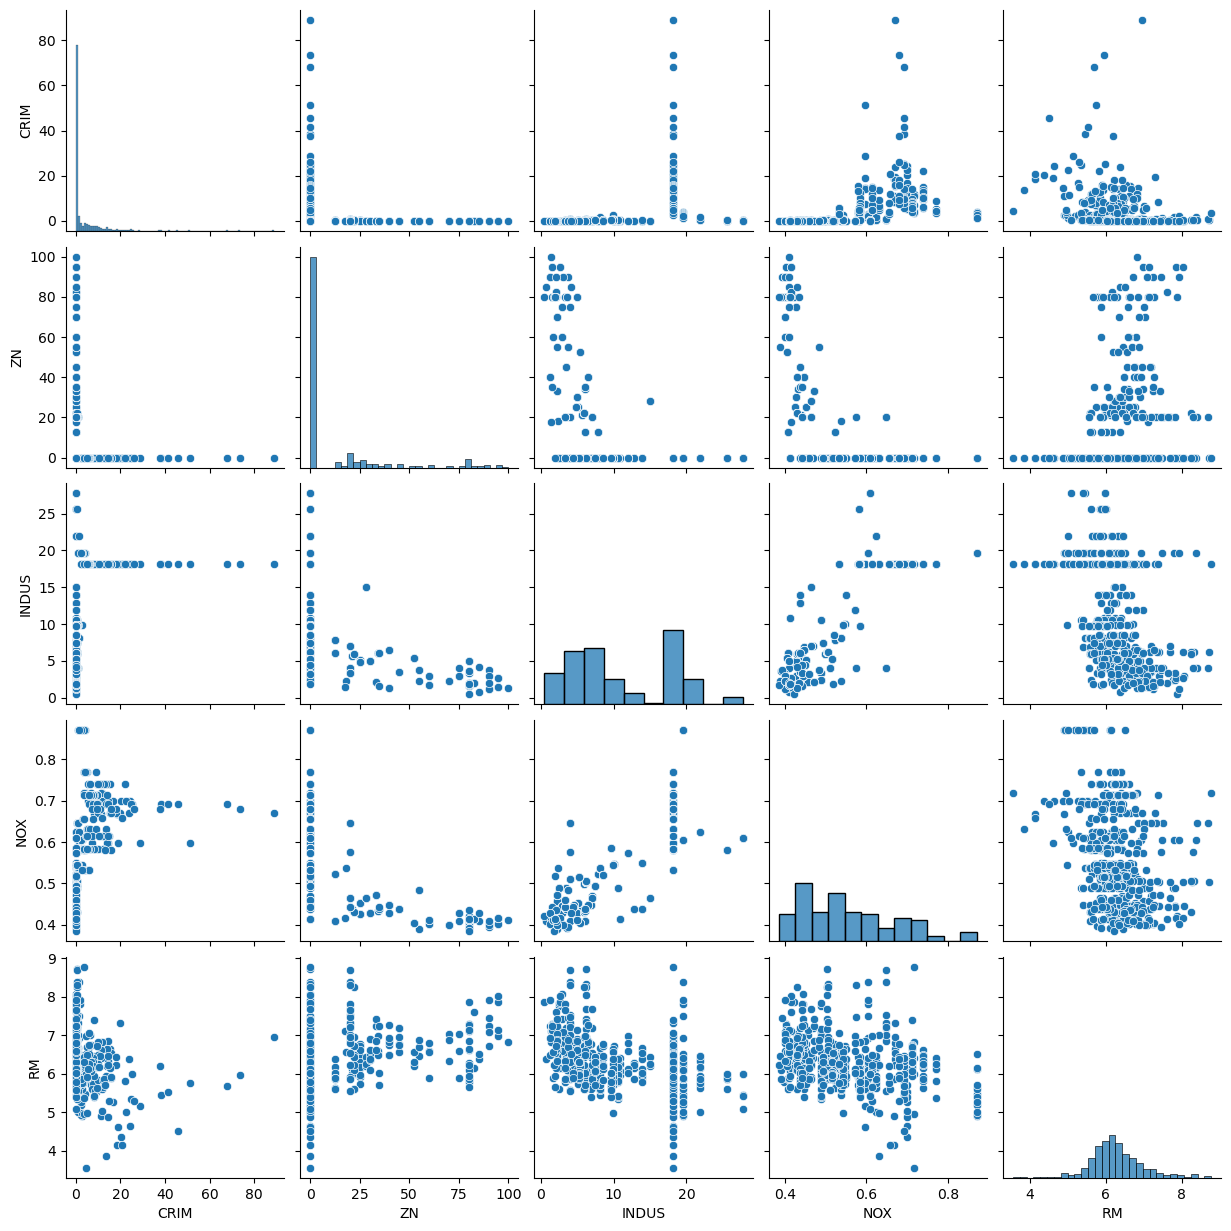

In [ ]:
sns.pairplot(df[col_study], height=2.5); #Crea el grafico con la lista anterior
plt.show()

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [ ]:
col_study = ['PTRATIO', 'B', 'LSTAT', 'MEDV'] #crea otra diferente lista

c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SABRINA PEREZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

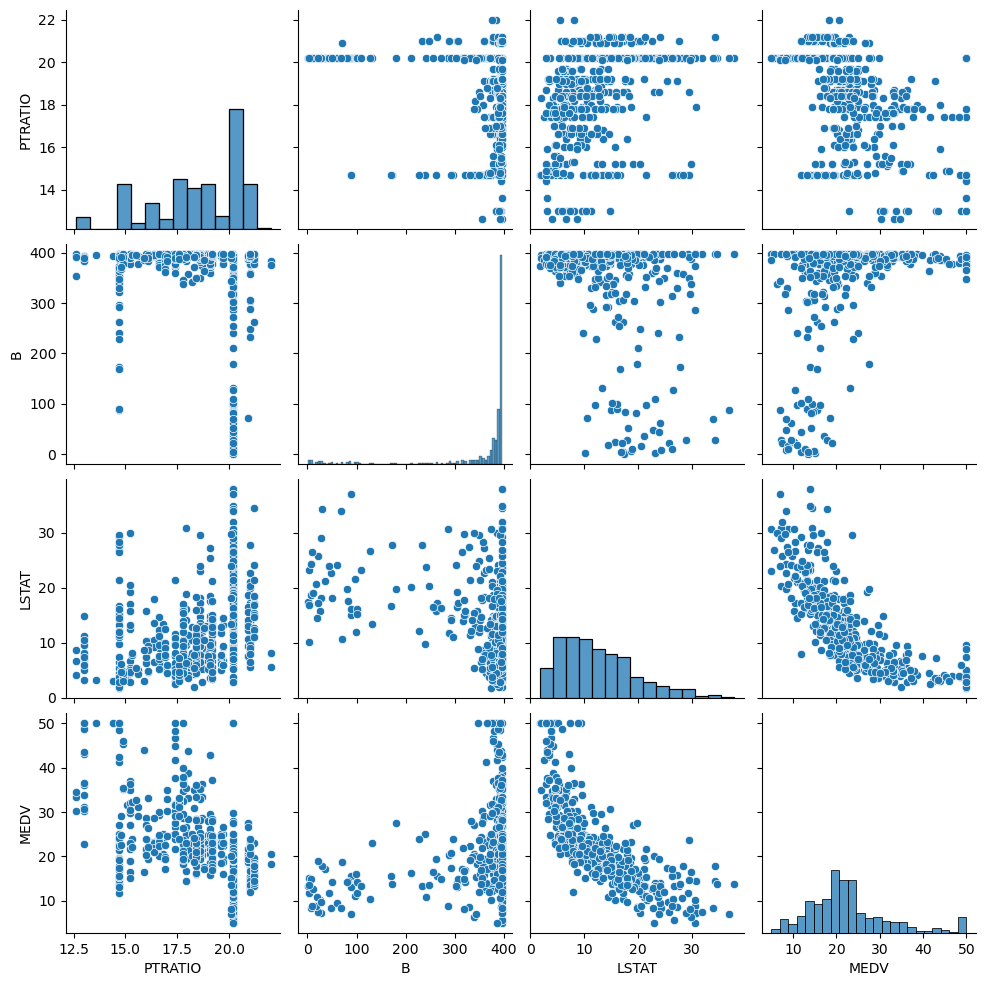

In [ ]:
sns.pairplot(df[col_study], height=2.5); #Crea el grafico con la lista anterior
plt.show()

***

# Correlation Analysis and Feature Selection

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format # Establece el formato de visualización para números de punto flotante en pandas DataFrames.
# Los números se mostrarán con dos decimales y separadores de miles (comas).


In [ ]:
df.corr() # Calcula la matriz de correlación del DataFrame 'df'.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


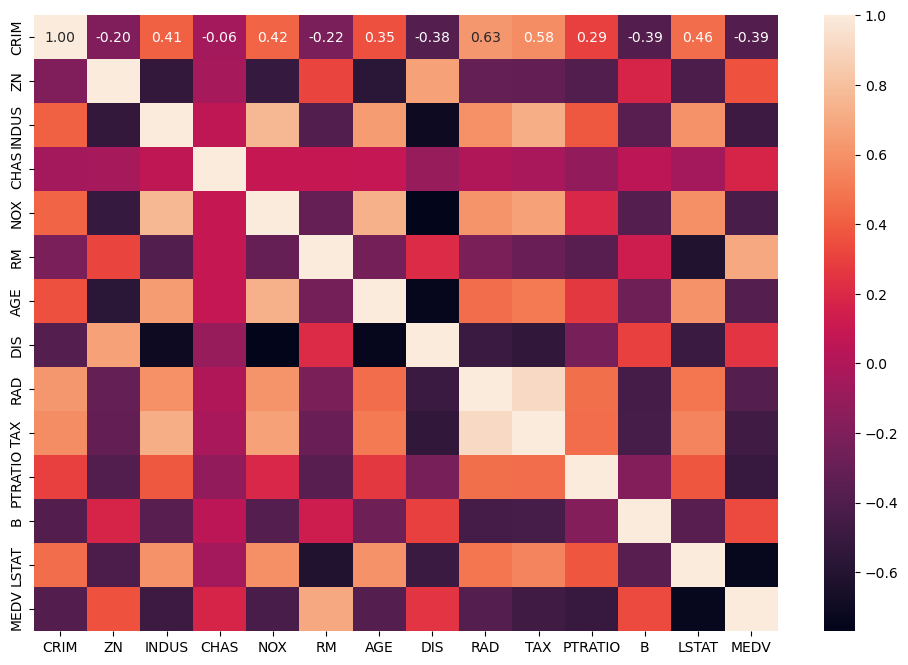

In [ ]:
plt.figure(figsize=(12,8)) #Crea la matriz de correlación en un heatmap para demostrarlo de forma más visual
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

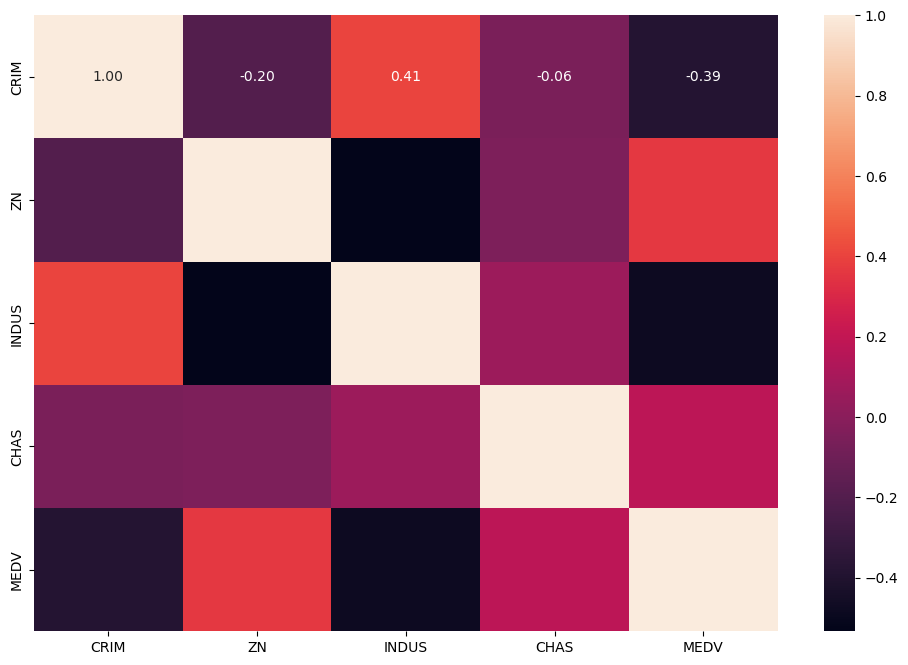

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot=True, fmt=".2f") #Hace la matriz de correlación con variables en especifico
plt.show()

In [ ]:
import matplotlib as mpl
print(mpl.__version__) #menciona la version de matplotlib descargada

3.8.0


***

# Linear Regression with Scikit-Learn

In [ ]:
df.head() #muestra las primeras 5 filas del dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [ ]:
X = df['RM'].values.reshape(-1,1) # Extrae la columna 'RM' del DataFrame 'df', convierte sus valores en un array de NumPy,y luego lo remodela para que tenga una sola columna.


In [ ]:
y = df['MEDV'].values # Extrae la columna 'MEDV' (valor medio de la vivienda) del DataFrame 'df' y la convierte en un array de NumPy.
# Este array representará la variable objetivo (y) para un modelo de aprendizaje automático.


In [ ]:
from sklearn.linear_model import LinearRegression #se importa el modelo de regresion lineal

In [ ]:
model = LinearRegression() #escoge el modelo de regresión lineal

In [ ]:
model.fit(X, y) # Entrena el modelo de regresión lineal utilizando los datos de entrenamiento.
# 'X' representa las características y 'y' representa la variable objetivo.

LinearRegression()

In [ ]:
model.coef_ # Muestra los coeficientes del modelo de regresión lineal entrenado.
# Estos coeficientes representan la pendiente de la línea de regresión.

array([9.10210898])

In [ ]:
model.intercept_ # Muestra el término independiente (intercepto) del modelo de regresión lineal entrenado.
# El intercepto representa el valor de la variable objetivo cuando todas las características son cero.

-34.670620776438554

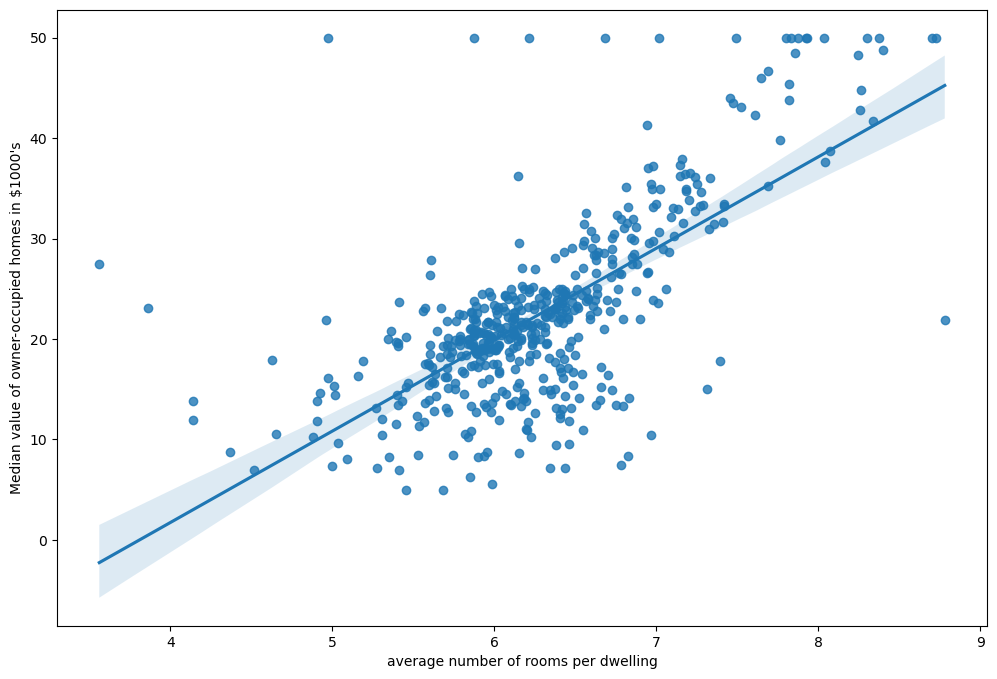

In [ ]:
 # Crea un gráfico de regresión utilizando Seaborn para visualizar la relación entre el número promedio de habitaciones y el valor medio de las viviendas.
# Ajusta el tamaño de la figura y muestra el gráfico resultante.##
plt.figure(figsize=(12,8))
sns.regplot(x=X.ravel(), y=y)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

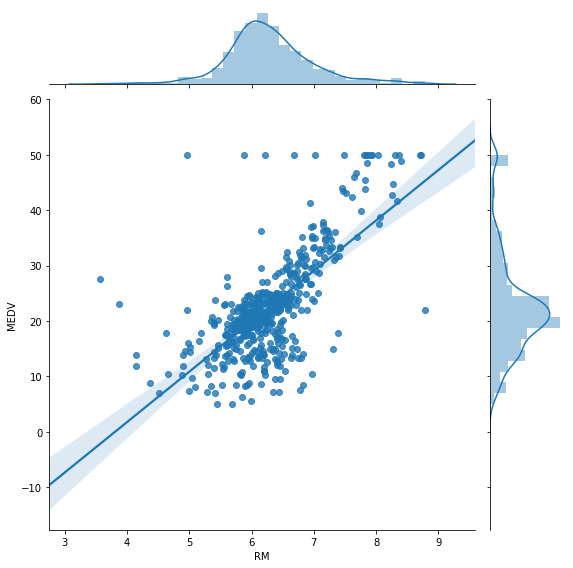

In [ ]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=8); # Crea un gráfico conjunto (jointplot)  para visualizar la relación entre 'RM' (número promedio de habitaciones) y 'MEDV' (valor medio de la vivienda).
# El gráfico incluye un diagrama de dispersión con una línea de regresión y histogramas marginales.
# Ajusta el tamaño del gráfico a 8 pulgadas de alto y muestra el gráfico resultante.
plt.show();

In [ ]:
model.predict(np.array([7]).reshape(1,-1)) # Realiza una predicción utilizando el modelo de regresión lineal entrenado.
# El modelo predice el valor de la variable objetivo para una vivienda con 7 habitaciones.

array([29.04414209])

***

Below is from Jacob T. VanderPlas text, Python Data Science Handbook: Essential Tools for Working with Data

Basics of the API:

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow):

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
   * For supervised learning, often we predict labels for unknown data using the predict() method.
   * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

***

In [ ]:
# Step 1: Selecting a model
# Se elige un modelo de regresión lineal para predecir el valor medio de la vivienda.

# Step 2: Instantiation
ml_2 = LinearRegression() # Se crea una instancia del modelo de regresión lineal y se asigna a la variable 'ml_2'.

# Step 3: Arrange data
X = df['LSTAT'].values.reshape(-1,1) # Se extrae la columna 'LSTAT' (porcentaje de la población de estatus socioeconómico bajo) del DataFrame 'df'
# y se remodela para que sea una matriz bidimensional, representando las características (X).
y = df['MEDV'].values # Se extrae la columna 'MEDV' (valor medio de la vivienda) del DataFrame 'df' y se convierte en un array unidimensional,
# representando la variable objetivo (y).

# Step 4: Model fitting
ml_2.fit(X, y) #Se entrena el modelo

# Step 5: Predict
ml_2.predict(np.array([15]).reshape(1,-1)) #Se usa el modelo para predecir el valor de medv con lsat=15

array([20.30310057])

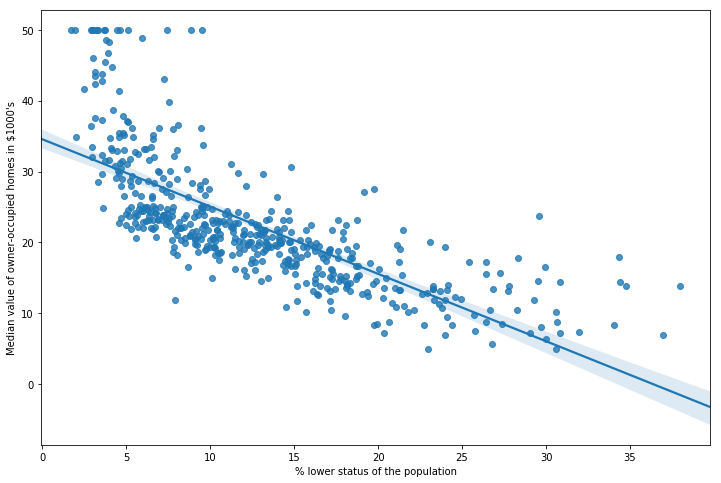

In [ ]:
plt.figure(figsize=(12,8)); #Crea un gráfico de regresión para visualizar la relación entre el porcentaje de población de estatus socioeconómico bajo ('LSTAT') y el valor medio de las viviendas ('MEDV').
sns.regplot(X, y);
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

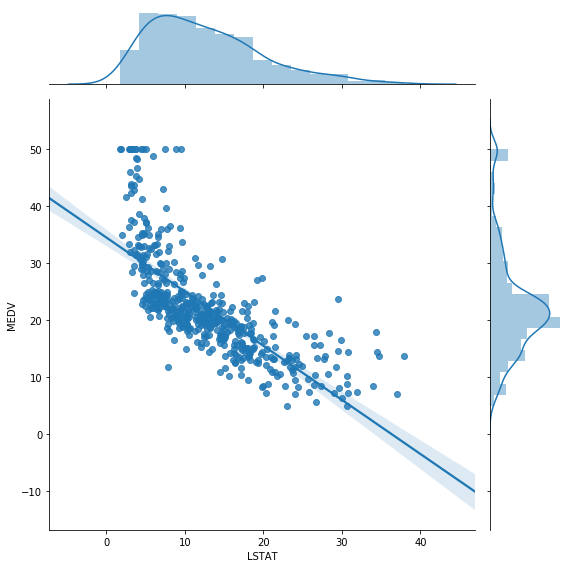

In [ ]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=8); #Crea un gráfico conjunto (jointplot) utilizando Seaborn para visualizar la relación entre 'LSTAT' (porcentaje de población de estatus socioeconómico bajo) y 'MEDV' (valor medio de las viviendas).
# El gráfico incluye un diagrama de dispersión con una línea de regresión y histogramas marginales.
plt.show();

***

# Robust Regression

Outlier Demo: [http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html](http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html)

In [ ]:
df.head() #Imprime las primeras 5 filas del df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


## RANdom SAmple Consensus (RANSAC) Algorithm

link = [http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [ ]:
X = df['RM'].values.reshape(-1,1) #Extrae las columnas para crear las variables dependiente e independiente
y = df['MEDV'].values

In [ ]:
from sklearn.linear_model import RANSACRegressor #Importa el modelo ransac r es un modelo de regresión robusto que es resistente a los valores atípicos.

In [ ]:
ransac = RANSACRegressor()  # Crea una instancia del modelo RANSACRegressor.

In [ ]:
ransac.fit(X, y) #Entrena el modelo

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [ ]:
# Crea máscaras booleanas para identificar los inliers y outliers detectados por el modelo RANSACRegressor.
inlier_mask = ransac.inlier_mask_ # 'inlier_mask' indica qué puntos de datos se consideran inliers
outlier_mask = np.logical_not(inlier_mask) #,'outlier_mask' indica cuáles son outliers.

In [ ]:
np.arange(3, 10, 1)  #Crea un array de NumPy que contiene una secuencia de números enteros.
# Los números comienzan en 3, terminan antes de 10, y se incrementan en 1 

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Genera puntos para trazar la línea de regresión ajustada por el modelo RANSACRegressor.
line_X = np.arange(3, 10, 1) # 'line_X' crea un rango de valores para la característica 'RM'
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))#'line_y_ransac' predice los valores correspondientes para la variable objetivo 'MEDV'.

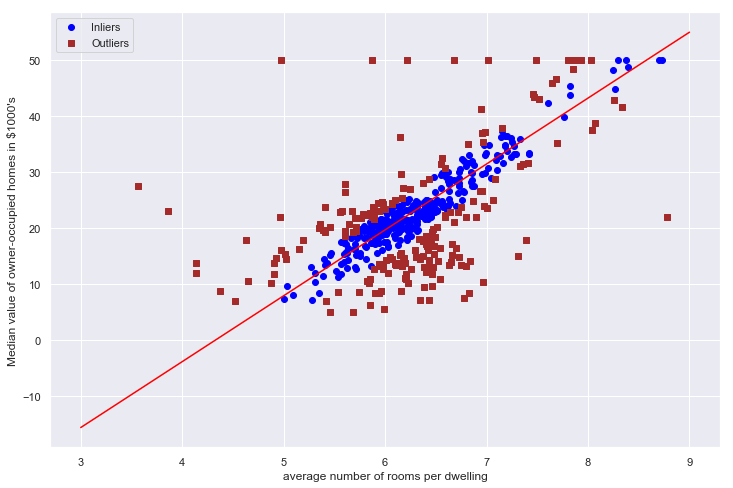

In [ ]:
# Crea un gráfico de dispersión que muestra los inliers y outliers detectados por el modelo RANSACRegressor, junto con la línea de regresión ajustada.
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [ ]:
ransac.estimator_.coef_ # Muestra los coeficientes del modelo de regresión lineal ajustado por el modelo

array([11.77867543])

In [ ]:
ransac.estimator_.intercept_ #Muestra el intercepto

-51.000997760262095

***

In [ ]:
# Prepara los datos para un modelo de regresión RANSAC usando 'LSTAT' como característica.
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
ransac.fit(X, y)# Entrena el modelo, identifica inliers y outliers, y genera puntos para trazar la línea de regresión.
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 40, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

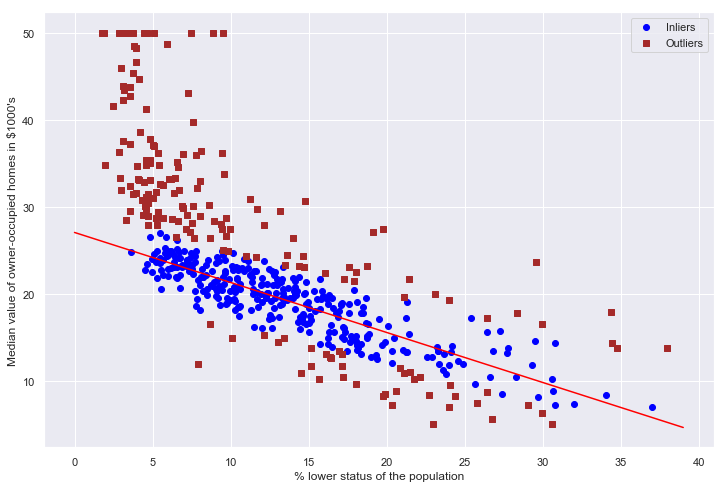

In [ ]:
# Crea un gráfico de dispersión que muestra los inliers y outliers detectados por el modelo RANSACRegressor,junto con la línea de regresión ajustada.
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

***

# Performance Evaluation of Regression Model

In [ ]:
from sklearn.model_selection import train_test_split #Descarga el train test split

In [ ]:
df.head() #Muestra las primeras 5 filas del data frame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [ ]:
#X = df['LSTAT'].values.reshape(-1,1)
X = df.iloc[:, :-1].values # Extrae todas las columnas del DataFrame 'df' excepto la última, y las convierte en un array de NumPy.
# Este array representará las características (X) para un modelo de aprendizaje automático.

In [ ]:
y = df['MEDV'].values # Extrae la columna 'MEDV' (valor medio de las viviendas) del DataFrame 'df' y la convierte en un array de NumPy.
# Este array representará la variable objetivo (y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Divide los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split

In [ ]:
lr = LinearRegression() #Crea la instancia del modelo de regresion lineal

In [ ]:
lr.fit(X_train, y_train) #Entrena el modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred = lr.predict(X_train) # Realiza predicciones sobre el conjunto de entrenamiento 

In [ ]:
y_test_pred = lr.predict(X_test) # Realiza predicciones sobre el conjunto de prueba

***

# Method 1: Residual Analysis

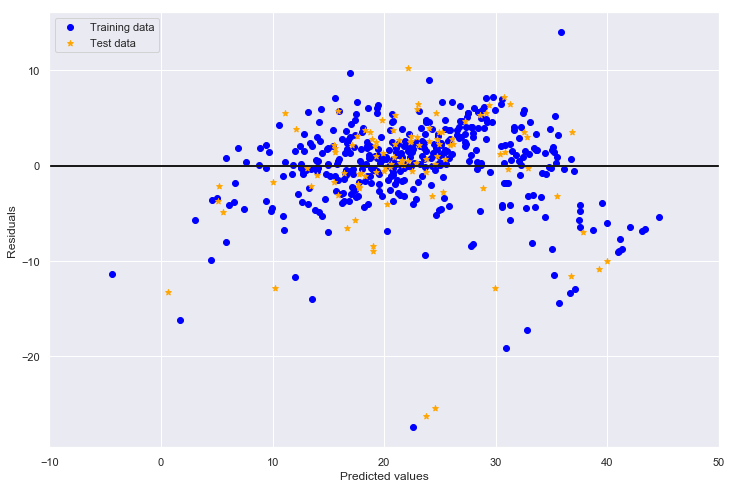

In [ ]:
# Crea un gráfico de residuos para visualizar el rendimiento del modelo de regresión lineal.
# Muestra los residuos para los conjuntos de entrenamiento y prueba, y una línea horizontal en y=0.

plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

***

# Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [ ]:
from sklearn.metrics import mean_squared_error #Descarga la metrica del error cuadratico medio

In [ ]:
mean_squared_error(y_train, y_train_pred) #calcula el error cuadratico medio  entre los valores objetivo reales del conjunto de entrenamiento (y_train)
# y los valores predichos por el modelo para el conjunto de entrenamiento 

19.326470203585725

In [ ]:
mean_squared_error(y_test, y_test_pred) # Calcula el error cuadrático medio (MSE) entre los valores objetivo reales del conjunto de prueba (y_test)
# y los valores predichos por el modelo

33.448979997676474

# Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [ ]:
from sklearn.metrics import r2_score #Descarga la metrica de r2

In [ ]:
r2_score(y_train, y_train_pred) #Calcula r2 entre los valores objetivo reales del conjunto de entrenamiento (y_train)
# y los valores predichos por el modelo para el conjunto de entrenamiento 

0.7730135569264234

In [ ]:
r2_score(y_test, y_test_pred) #Calcula r2  entre los valores objetivo reales del conjunto de prueba (y_test)
# y los valores predichos por el modelo

0.5892223849182514

***

# What does a Near Perfect Model Looks like?

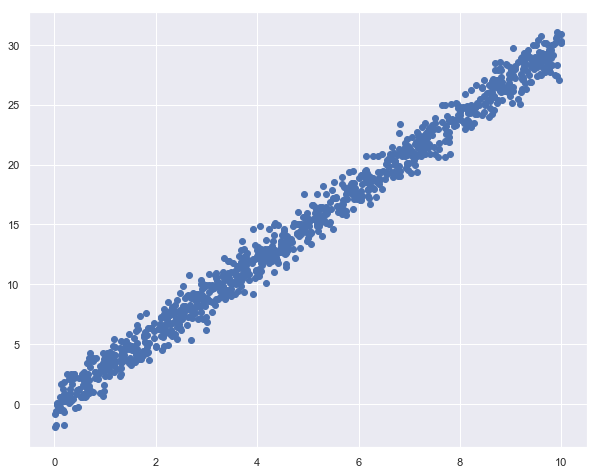

In [ ]:
# Genera datos aleatorios para una regresión lineal simple y los visualiza en un gráfico de dispersión.
# 'x' representa la variable independiente, 'y' representa la variable dependiente con ruido gaussiano añadido.
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split #Vuelve a importar train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  # Divide los datos generados aleatoriamente en conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.linear_model import LinearRegression
#Crea y entrena el modelo de regresión linea de una vez
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1: Residual Analysis

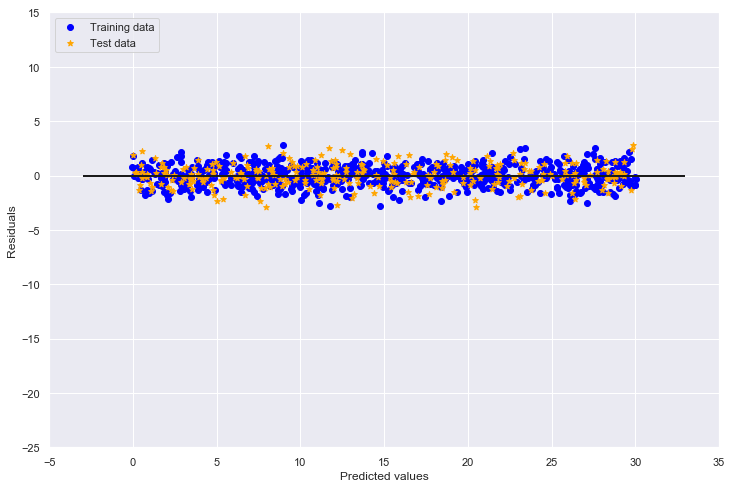

In [ ]:
# Crea un gráfico de residuos para visualizar el rendimiento del modelo de regresión lineal.
# Muestra los residuos para los conjuntos de entrenamiento y prueba, y una línea horizontal en y=0.

plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

# Method 2: Mean Squared Error (MSE)

In [ ]:
mean_squared_error(y_train, y_train_pred) #Obtiene el error cuadratico medio 

0.862808122458205

In [ ]:
mean_squared_error(y_test, y_test_pred)  #Obtiene el error cuadratico medio 

1.06652056061233

# Method 3: Coefficient of Determination, $R^2$

In [ ]:
r2_score(y_train, y_train_pred) #Obtiene R2

0.9887688169847341

In [ ]:
r2_score(y_test, y_test_pred) #Obtiene R2

0.9862365252130854

***

# Yet to be covered

* Mean Absolute Error
* Stratified Shuffle Split
* Feature Engineering. E.g., Combining Features, Designing derivative features
* Data preparation. E.g., missing values etc.
* Categorical features
* Transform data / feature scaling. Scikit-learn Pipeline
* Fine Tuning. E.g., Grid Search, Randomized Search
* Ensemble Methods


***